In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np

In [19]:
apac_df = pd.read_csv("APAC_BRASIL_FULL.csv", sep=",")
apac_df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (53) have mixed types.Specify dtype option on import or set low_memory=False.



,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104
2,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,12,0,130,1,F,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244
3,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,7,0,130,1,F,3,270860,1,1,10.0,10.0,0,1,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104
4,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,207285021130003,225135,0,0,0,0,0,0,L209,0,0,1,1,0,130,1,M,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104


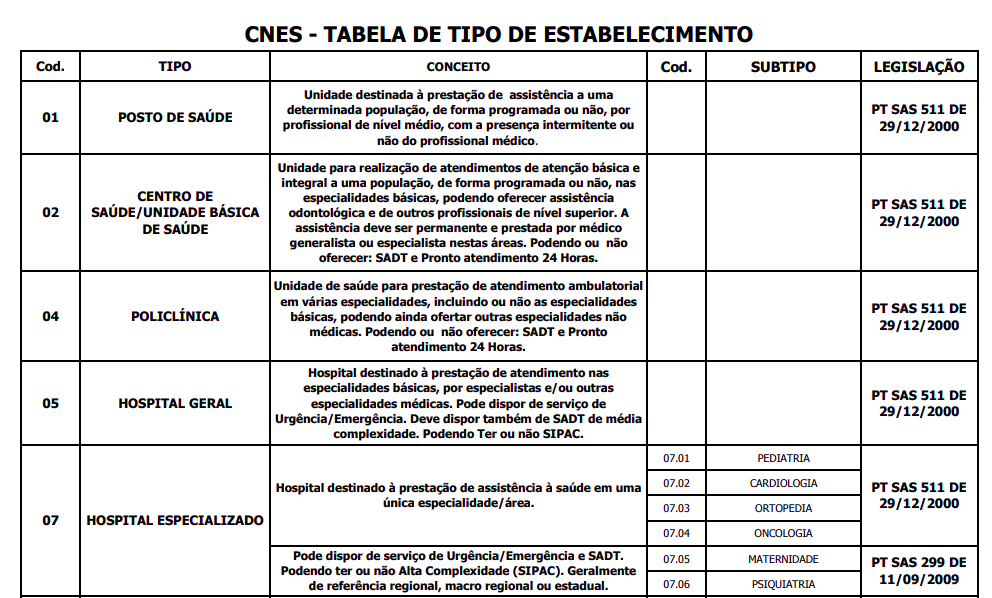

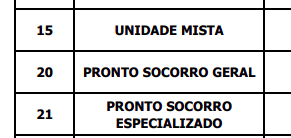

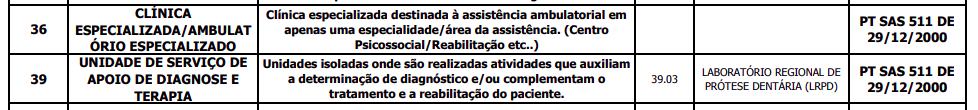

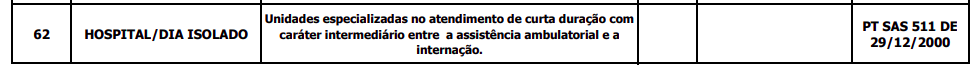

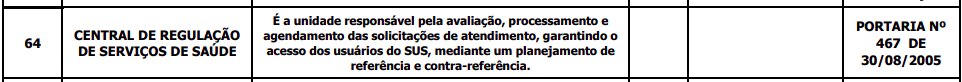

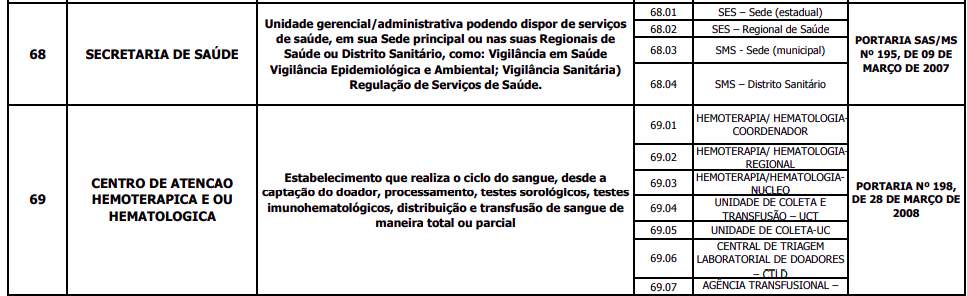

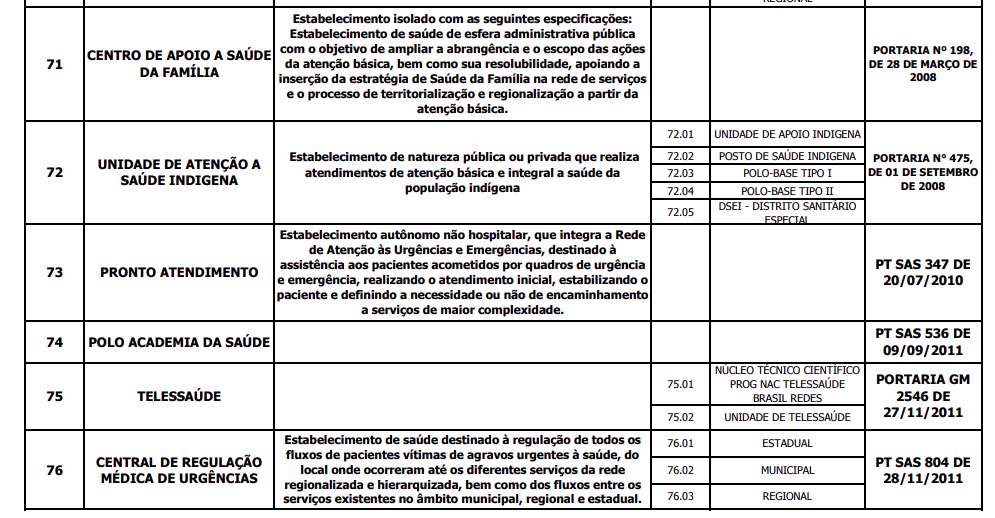

In [3]:
apac_df.isna().sum()

PA_CODUNI         0
PA_GESTAO         1
PA_CONDIC         1
PA_UFMUN          1
PA_REGCT          1
PA_INCOUT         1
PA_INCURG         1
PA_TPUPS          1
PA_TIPPRE         1
PA_MN_IND         1
PA_CNPJCPF        1
PA_CNPJMNT        1
PA_CNPJ_CC        1
PA_MVM            1
PA_CMP            1
PA_PROC_ID        1
PA_TPFIN          1
PA_SUBFIN         1
PA_NIVCPL         1
PA_DOCORIG        1
PA_AUTORIZ        1
PA_CNSMED         1
PA_CBOCOD         1
PA_MOTSAI         1
PA_OBITO          1
PA_ENCERR         1
PA_PERMAN         1
PA_ALTA           1
PA_TRANSF         1
PA_CIDPRI         1
PA_CIDSEC         1
PA_CIDCAS         1
PA_CATEND         1
PA_IDADE          1
IDADEMIN          1
IDADEMAX          1
PA_FLIDADE        1
PA_SEXO           1
PA_RACACOR        1
PA_MUNPCN         1
PA_QTDPRO         1
PA_QTDAPR         1
PA_VALPRO         1
PA_VALAPR         1
PA_UFDIF          1
PA_MNDIF          1
PA_DIF_VAL        1
NU_VPA_TOT        1
NU_PA_TOT         1
PA_INDICA         1


In [4]:
#analisando os dados únicos presentes na coluna referente ao tipo de estabelecimento - PA_TPUPS
sorted(apac_df['PA_TPUPS'].unique())

[1.0,
 2.0,
 4.0,
 5.0,
 7.0,
 15.0,
 20.0,
 21.0,
 36.0,
 39.0,
 62.0,
 64.0,
 68.0,
 69.0,
 71.0,
 73.0,
 76.0,
 80.0,
 81.0,
 84.0,
 nan]

In [5]:
#verificando o caráter de atendimento - PA_CATEND
apac_df['PA_CATEND'].unique()

array([ 1.,  2.,  6.,  3.,  5., nan])

In [6]:
#analisando os valores únicos referente ao Código do SCNES do Estabelecimento de Saúde - PA_CODUNI
coduni = apac_df['PA_CODUNI'].unique()
Array = np.array(coduni)
Array

array([2010216, 2006197, 2675560, 2384299, 2306344,   10103,   10049,
         10073,   10081, 7949553, 2559404, 2592746, 2534789, 7115652,
       6916074, 2086492, 9211861, 9242295, 2074052, 2081458, 9120068,
       5585147, 2246988, 2233355, 2250802, 9361413, 2262274,   10111,
         10243, 2079798, 6992560, 2078015, 9516182, 9949763, 9372822,
         59218, 6708714, 7592477, 7078730, 5215269, 2296616, 5130794,
       2165201, 7396805, 2561492,   21768, 3534979,   10030,   10057,
       5621534, 2160137, 2109441, 2012650, 2081253, 7877447, 3157245,
       2511738, 7116756, 7465157, 2673916, 6873960, 2269295, 9079939,
       9080163, 7101856, 2270420, 2273179, 2708426, 9160876, 2269953,
       2269732, 2273063, 2273551, 2788942, 8013543, 9794506, 5883229,
       2814455, 2063603, 2784602, 7792522, 2698471, 9400109, 7035861,
       2062054, 2079925, 9024980, 2311607, 2016672, 2011905, 2695251,
       2748223, 4050088, 2788322, 2787377, 2788993, 3827836, 6950175,
         17396, 2682

In [7]:
#agrupando os valores por código e contabilizando a frequencia de repetição dos mesmos no dataframe
coduni = apac_df.groupby(['PA_CODUNI']).size().reset_index(name="count")
coduni.to_csv("coduni.csv", index=True)

In [8]:
coduni

,PA_CODUNI,count
0,396,2
1,485,1
2,3018,1
3,3271,1
4,3816,28
...,...,...
994,9922962,1
995,9939938,9
996,9944532,19
997,9949763,15


In [9]:
#contabilizando os valores totais aprovados do procedimento por estabelecimento de saúde
coduniSum = apac_df.groupby(['PA_CODUNI'])['PA_VALAPR'].sum().reset_index(name="sum")
coduniSum

,PA_CODUNI,sum
0,396,48.00
1,485,3.37
2,3018,55.10
3,3271,24.00
4,3816,727.89
...,...,...
994,9922962,10.00
995,9939938,90.00
996,9944532,12.47
997,9949763,150.00


In [10]:
#unindo os dataframes de frequencia de aparição e valores totais aprovados por estabelecimento
comparacao = pd.merge(coduni, coduniSum, how = 'left', on = 'PA_CODUNI')
comparacao

,PA_CODUNI,count,sum
0,396,2,48.00
1,485,1,3.37
2,3018,1,55.10
3,3271,1,24.00
4,3816,28,727.89
...,...,...,...
994,9922962,1,10.00
995,9939938,9,90.00
996,9944532,19,12.47
997,9949763,15,150.00


In [11]:
comparacao['sum'].sum()

384141.97000000003

In [12]:
comparacao.to_csv("comparacao.csv", index=True)

In [13]:
apac_df.shape

(33030, 60)

In [14]:
len(apac_df)

33030

In [15]:
#verificando se a data do procedimento é sempre a mesma da data de processamento. Imprimindo os valores diferentes
for i in range(len(apac_df)):
  if apac_df['PA_MVM'].iloc[i] != apac_df['PA_CMP'].iloc[i]:
    print(i)
    print(apac_df['PA_MVM'].iloc[i], apac_df['PA_CMP'].iloc[i])
    print("-------------------------------------------------------------------------------------------------------\n")

A saída de streaming foi truncada nas últimas 5000 linhas.
8504
201910.0 201908.0
-------------------------------------------------------------------------------------------------------

8505
201910.0 201908.0
-------------------------------------------------------------------------------------------------------

8553
201704.0 201703.0
-------------------------------------------------------------------------------------------------------

8575
201906.0 201905.0
-------------------------------------------------------------------------------------------------------

8592
201912.0 201909.0
-------------------------------------------------------------------------------------------------------

8593
201912.0 201911.0
-------------------------------------------------------------------------------------------------------

8594
201912.0 201911.0
-------------------------------------------------------------------------------------------------------

8599
201912.0 201911.0
----------------------

In [20]:
#incluindo as colunas de ano e mês baseado na data de processamento/movimento - PA_MVM
for i in range(len(apac_df)):
  val = str(apac_df['PA_MVM'][i])
  split_dates = [val[i:i+4] for i in range(0, len(val), 4)]
  apac_df.loc[i, 'YEAR'] = split_dates[0]
  apac_df.loc[i, 'MONTH'] = split_dates[1]
apac_df.head(3)

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR,YEAR,MONTH
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11
2,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,12,0,130,1,F,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11


In [21]:
#exportando os dados com as novas colunas de ano e mês
apac_df.to_csv("APAC_BRASIL_FULL_WITHYEARMONTH.csv", index=True)

In [22]:
#agrupando os códigos dos estabelecimentos por ano e somando os valores totais aprovados para cada combinação
coduniSum = apac_df.groupby(['PA_CODUNI', 'YEAR'])['PA_VALAPR'].agg('sum').reset_index(name='sum')
coduniSum

,PA_CODUNI,YEAR,sum
0,396,2017,24.00
1,396,2019,24.00
2,396,2020,24.00
3,485,2017,3.37
4,3018,2016,55.10
...,...,...,...
1818,9922962,2020,10.00
1819,9939938,2020,90.00
1820,9944532,2020,12.47
1821,9949763,2020,150.00


In [23]:
sorted(apac_df['YEAR'].unique())

['2016', '2017', '2018', '2019', '2020']

In [24]:
apac_df['PA_VALAPR'].dtypes

dtype('float64')

In [25]:
#apenas trocando o nome da coluna com os dados agregados
coduniSum1 = apac_df.groupby(['PA_CODUNI', 'YEAR'])['PA_VALAPR'].agg('sum').reset_index(name='PA_VALAPR')
coduniSum1

,PA_CODUNI,YEAR,PA_VALAPR
0,396,2017,24.00
1,396,2019,24.00
2,396,2020,24.00
3,485,2017,3.37
4,3018,2016,55.10
...,...,...,...
1818,9922962,2020,10.00
1819,9939938,2020,90.00
1820,9944532,2020,12.47
1821,9949763,2020,150.00


In [26]:
#somatória dos valores totais aprovados por ano
coduniSum2 = apac_df.groupby(['YEAR'])['PA_VALAPR'].agg('sum').reset_index(name='PA_VALAPR')
coduniSum2

,YEAR,PA_VALAPR
0,2016,59763.76
1,2017,100650.78
2,2018,103282.10
3,2019,161285.46
4,2020,102858.42


In [27]:
coduniSum2['PA_VALAPR'].sum()

527840.5200000025

In [28]:
#somatória dos valores totais aprovados por estabelecimento dos anos de 2016-2020
coduniSum1_1 = apac_df.groupby(['PA_CODUNI'])['PA_VALAPR'].agg('sum').reset_index(name='PA_VALAPR')
coduniSum1_1

,PA_CODUNI,PA_VALAPR
0,396,72.00
1,485,3.37
2,3018,55.10
3,3271,24.00
4,3816,727.89
...,...,...
1074,9922962,10.00
1075,9939938,90.00
1076,9944532,12.47
1077,9949763,150.00


In [29]:
#PA_VALAPR - Valor Aprovado do procedimento

# de acordo com o documento oficial:
'''O valor aprovado contido nos arquivos de APAC refere-se ao valor total da APAC'''


apac_df_valapr = apac_df.groupby(['YEAR','MONTH'])['PA_VALAPR'].agg('sum').reset_index()
apac_df_valapr = pd.DataFrame(apac_df_valapr)
apac_df_valapr

,YEAR,MONTH,PA_VALAPR
0,2016,01,3396.30
1,2016,02,3835.96
2,2016,03,2965.94
3,2016,04,4184.87
4,2016,05,3248.84
5,2016,06,4785.42
6,2016,07,3705.46
7,2016,08,4260.16
8,2016,09,3331.71
9,2016,10,10054.83


In [30]:
apac_df_valapr.to_csv("contage_ano_mes.csv", index=True)

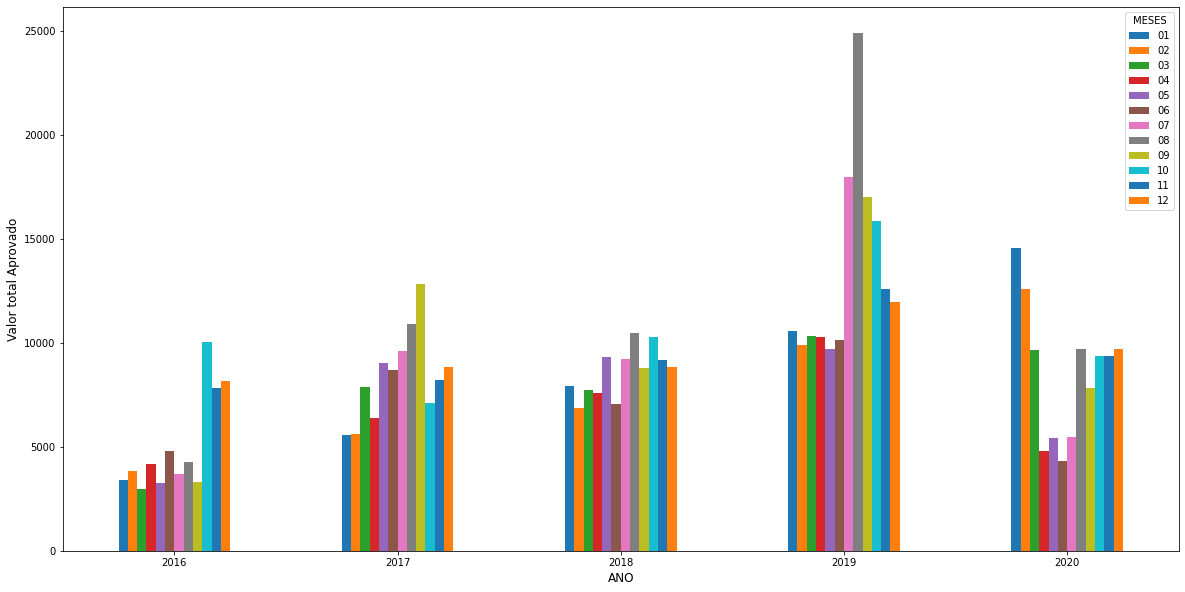

In [31]:
#plotando o gráfico da tabela pivot
apac_df_valapr.pivot("YEAR", "MONTH", "PA_VALAPR").plot(kind='bar', figsize = (20,10), rot= 0)
plt.legend(title = "MESES")
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12)
plt.show()

In [32]:
#Valor total Aprovado por ano
apac_df_valAprovado = apac_df.groupby(['YEAR'])['PA_VALAPR'].sum().reset_index()
apac_df_valAprovado

,YEAR,PA_VALAPR
0,2016,59763.76
1,2017,100650.78
2,2018,103282.10
3,2019,161285.46
4,2020,102858.42


In [33]:
apac_df_valAprovado.to_csv("valorAprovadoAno.csv", index=True)

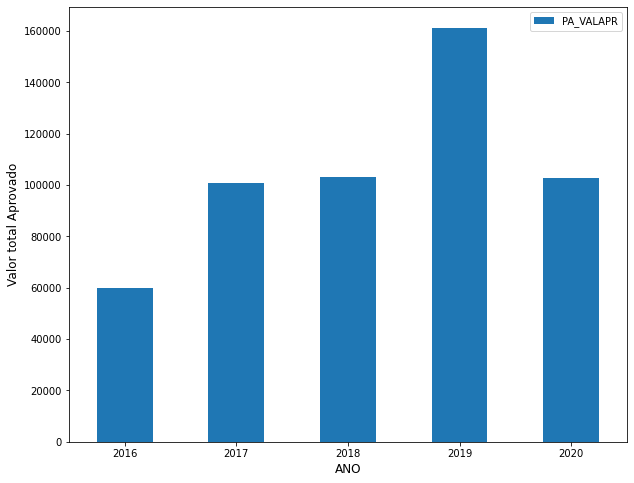

In [34]:
#plotando o gráfico do valor total por ano
apac_df_valAprovado.set_index('YEAR').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12);

#2017, 2018 e 2020 tem valores bem parecidos, 2019 teve um aumento bem considerável nos gastos

ANALISANDO O TIPO DE ESTABELECIMENTO:

FONTE:
https://saude.campinas.sp.gov.br/cnes/fichas/cnes_integral/CNES_preench_ficha_01.pdf

In [35]:
#carregando o dataset do CNES - código nacional de estabelecimentos de saúde
cnes_df = pd.read_csv('cnes.csv', sep=",")
cnes_df.head(3)

,CNES,NOME
0,1,POSTO DE SAÚDE
1,2,CENTRO DE SAÚDE/UNIDADE BÁSICA DE SAÚDE
2,4,POLICLÍNICA


In [36]:
apac_df_1 = apac_df.copy()
apac_df_1.head(2)

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR,YEAR,MONTH
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11


In [37]:
apac_df_1.shape

(46150, 62)

In [38]:
len(apac_df_1)

46150

In [39]:
cnes_df['CNES'].values

array([ 1,  2,  4,  5,  7, 15, 20, 21, 36, 39, 62, 64, 68, 69, 71, 73, 76,
       80, 81, 84])

In [40]:
idx = cnes_df[cnes_df['CNES']==1].index
idx.values[0]
nome  = cnes_df['NOME'].iloc[idx.values[0]]
nome

'POSTO DE SAÚDE'

In [41]:
nomeList = []
for i in range(len(apac_df_1)):
  val = apac_df_1['PA_TPUPS'].iloc[i] 
  idx = cnes_df[cnes_df['CNES']==val].index
  nome = cnes_df['NOME'].iloc[idx.values[0]]
  nomeList.append(nome)

nomeList

['CLÍNICA/CENTRO DE ESPECIALIDADE',
 'HOSPITAL GERAL',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'HOSPITAL GERAL',
 'HOSPITAL GERAL',
 'HOSPITAL GERAL',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'HOSPITAL GERAL',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'HOSPITAL GERAL',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'HOSPITAL GERAL',
 'HOSPITAL GERAL',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'CLÍNICA/CENTRO DE ESPECIALIDADE',
 'HOSPITAL GERAL',
 'HOSPITAL GERAL',
 'CLÍNICA/CENTRO D

In [42]:
apac_df_1.insert(62, 'NOME_ESTABELECIMENTO', nomeList)
apac_df_1.head(3)

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR,YEAR,MONTH,NOME_ESTABELECIMENTO
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11,HOSPITAL GERAL
2,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,12,0,130,1,F,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE


In [43]:
apac_df_2 = apac_df_1.groupby(['NOME_ESTABELECIMENTO','YEAR'])['PA_VALAPR'].agg('sum').reset_index()
apac_df_2 = pd.DataFrame(apac_df_2)
apac_df_2

,NOME_ESTABELECIMENTO,YEAR,PA_VALAPR
0,CENTRAL DE ABASTECIMENTO,2019,0.00
1,CENTRAL DE ABASTECIMENTO,2020,0.00
2,CENTRAL DE GESTÃO EM SAÚDE,2016,77.90
3,CENTRAL DE GESTÃO EM SAÚDE,2017,68.00
4,CENTRAL DE GESTÃO EM SAÚDE,2018,56.40
...,...,...,...
71,UNIDADE DE SERVIÇO DE APOIO DE DIAGNOSE E TERAPIA,2020,8680.01
72,UNIDADE MISTA,2017,537.50
73,UNIDADE MISTA,2018,528.86
74,UNIDADE MISTA,2019,34.20


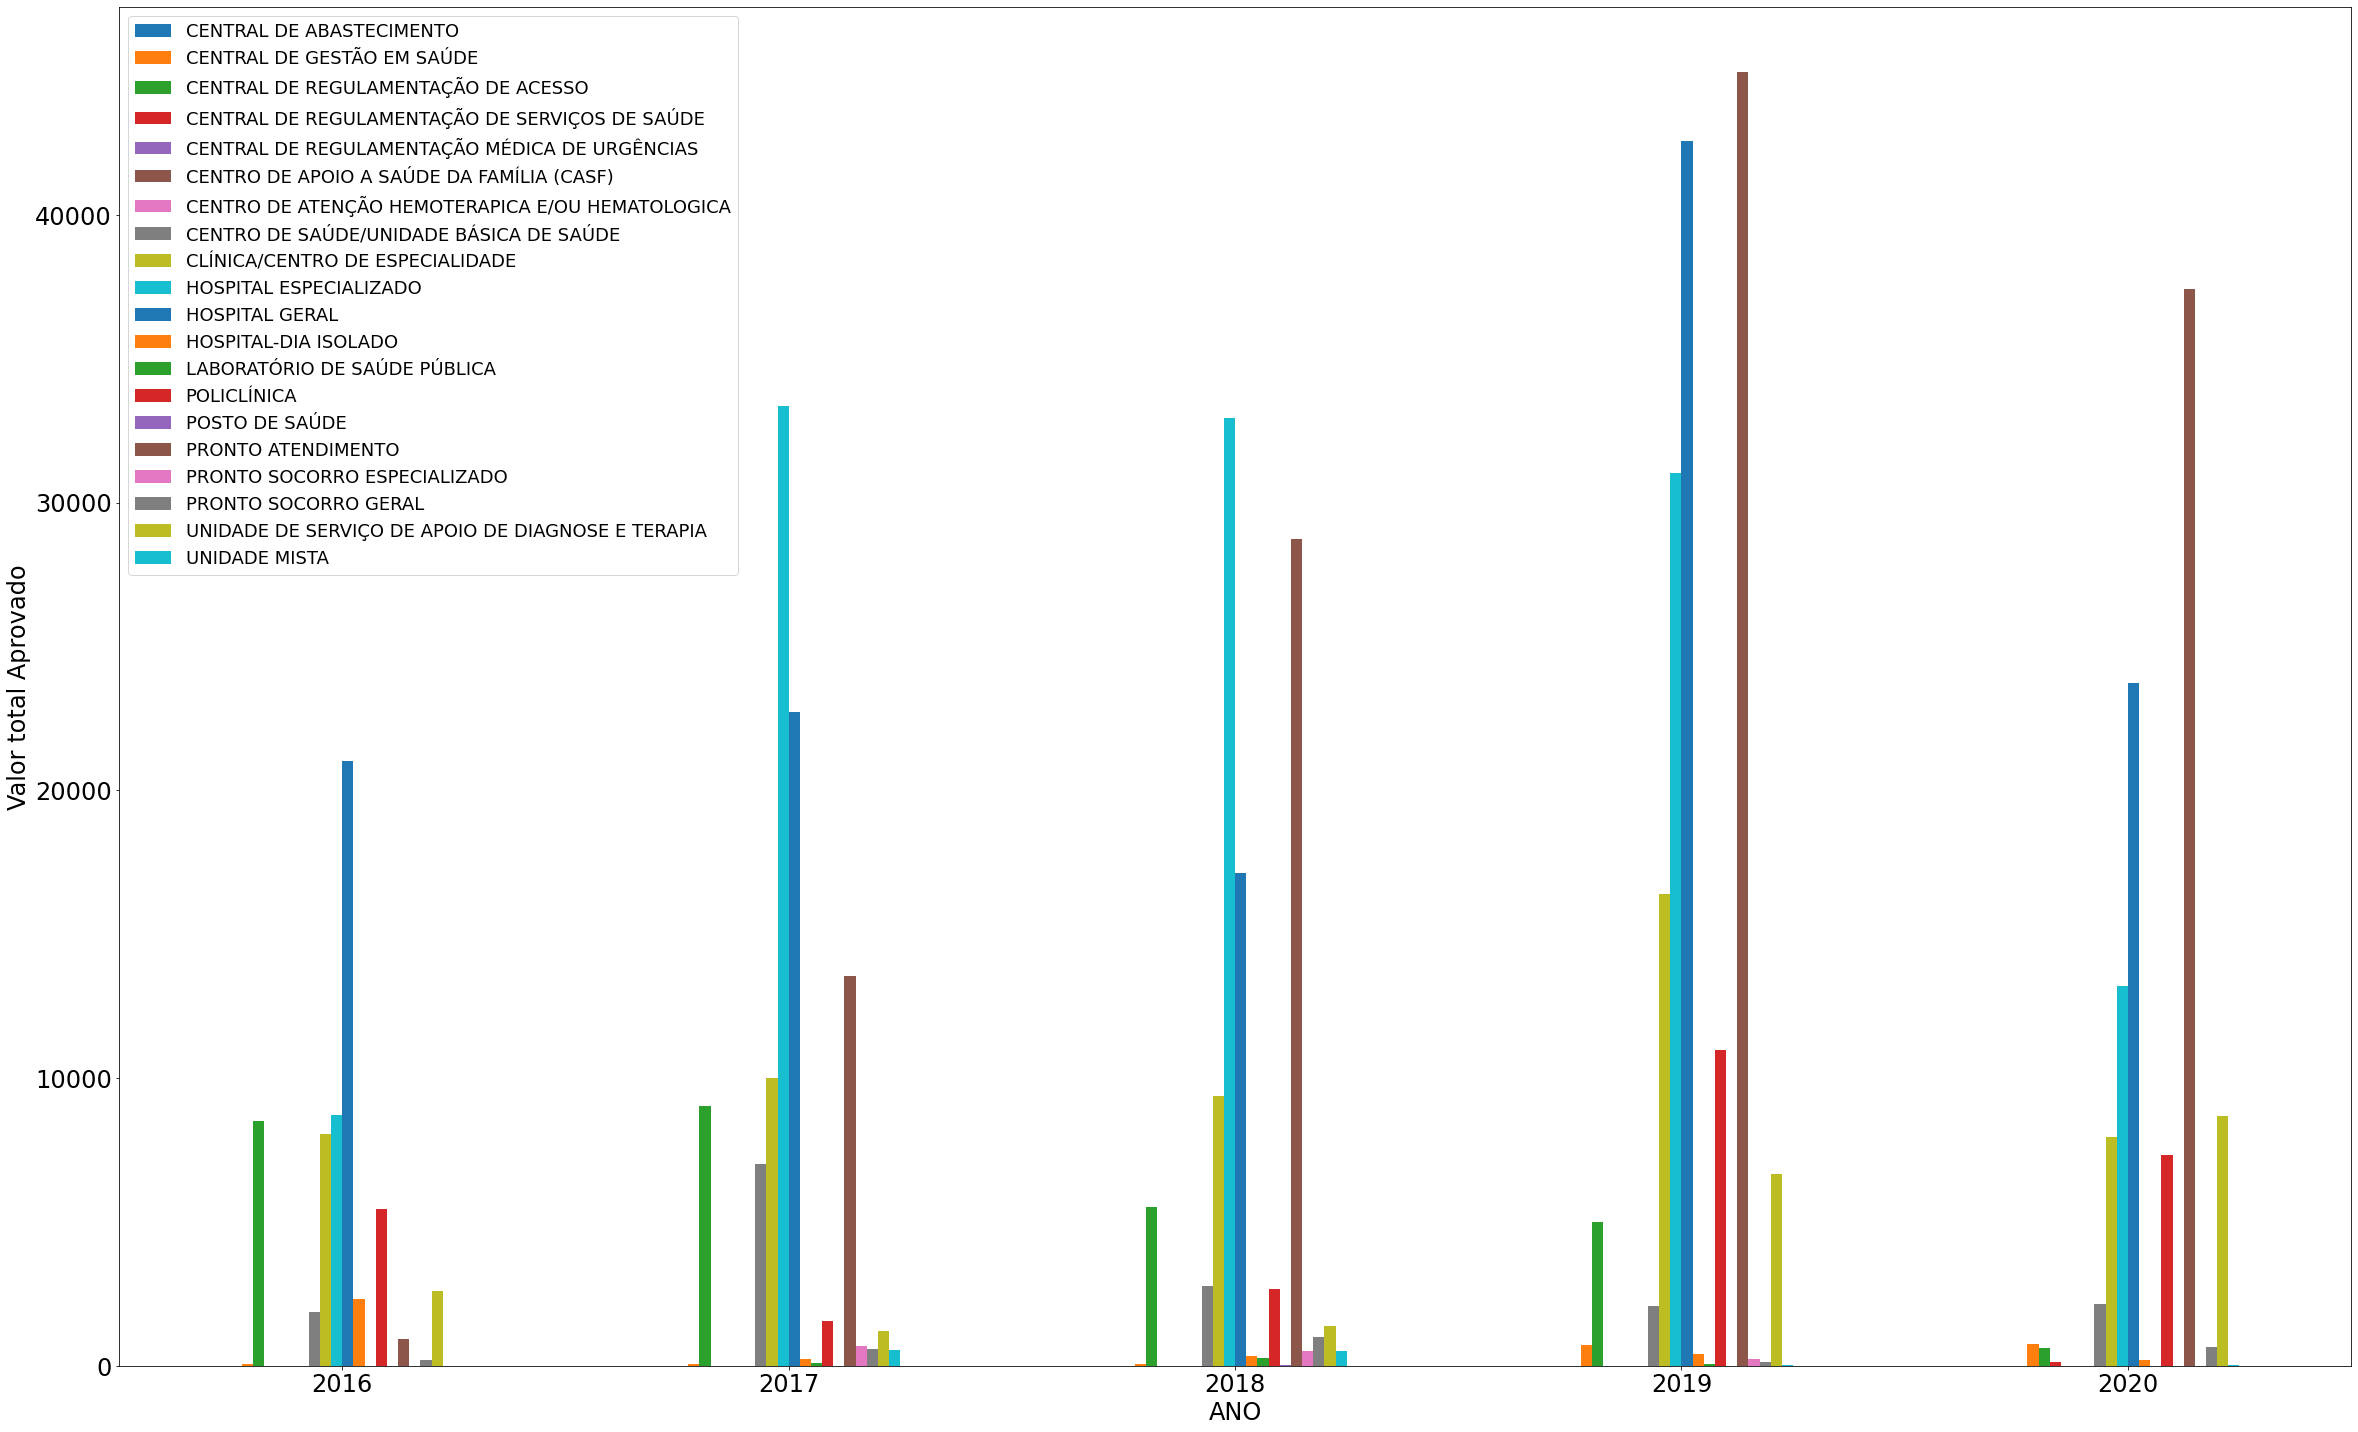

In [44]:
#plotando o gráfico da tabela pivot dos gastos totais por estabelecimento para os anos de 2016-2020
apac_df_2.pivot("YEAR", "NOME_ESTABELECIMENTO", "PA_VALAPR").plot(kind='bar', figsize = (40,25), rot= 0)
plt.legend(fontsize=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('ANO', fontsize=24)
plt.ylabel('Valor total Aprovado', fontsize=24)
plt.show()

In [45]:
#calculando o somatório dos valores totais aprovados por estabelecimento para os anos de 2016-2020
apac_df_3 = apac_df_1.groupby(['NOME_ESTABELECIMENTO'])['PA_VALAPR'].agg('sum').reset_index()
apac_df_3 = pd.DataFrame(apac_df_3)
apac_df_3

,NOME_ESTABELECIMENTO,PA_VALAPR
0,CENTRAL DE ABASTECIMENTO,0.00
1,CENTRAL DE GESTÃO EM SAÚDE,1687.30
2,CENTRAL DE REGULAMENTAÇÃO DE ACESSO,28652.00
3,CENTRAL DE REGULAMENTAÇÃO DE SERVIÇOS DE SAÚDE,144.00
4,CENTRAL DE REGULAMENTAÇÃO MÉDICA DE URGÊNCIAS,0.00
5,CENTRO DE APOIO A SAÚDE DA FAMÍLIA (CASF),0.00
6,CENTRO DE ATENÇÃO HEMOTERAPICA E/OU HEMATOLOGICA,20.00
7,CENTRO DE SAÚDE/UNIDADE BÁSICA DE SAÚDE,15920.48
8,CLÍNICA/CENTRO DE ESPECIALIDADE,51782.32
9,HOSPITAL ESPECIALIZADO,119236.54


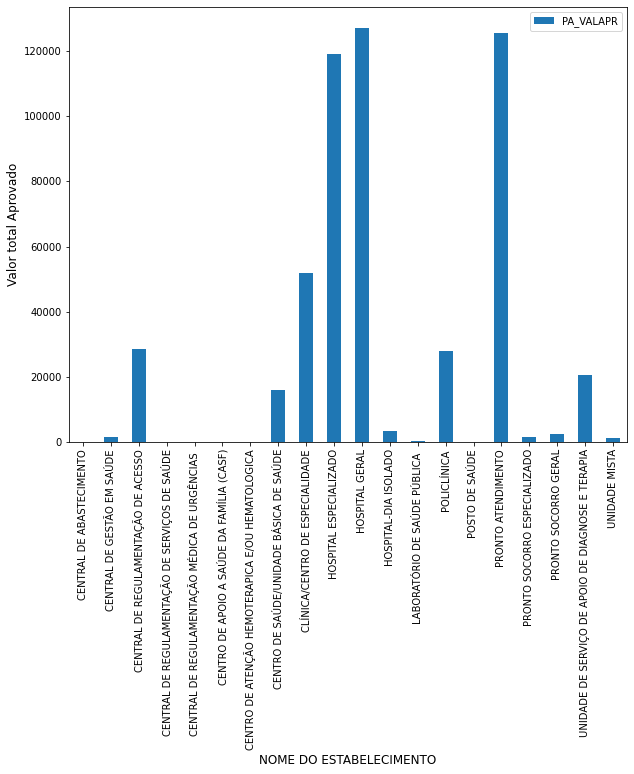

In [46]:
#plotando o gráfico por valor anual gasto para os estabelecimentos
apac_df_3.set_index('NOME_ESTABELECIMENTO').plot(kind='bar', figsize=(10, 8), rot=90);
plt.xlabel('NOME DO ESTABELECIMENTO', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12);

In [47]:
#custo pela faixa etária
idadeList = []
for i in range(len(apac_df_1)):
  val = apac_df_1['PA_IDADE'].iloc[i] 
  if val < 6:
    idadeList.append("0-5")
  elif val < 12:
    idadeList.append("6-11")
  elif val < 18:
    idadeList.append("12-17")
  elif val < 30:
    idadeList.append("18-29")
  elif val < 50:
    idadeList.append("30-49")
  else:
    idadeList.append(">=50")

idadeList

['>=50',
 '6-11',
 '12-17',
 '6-11',
 '0-5',
 '6-11',
 '>=50',
 '30-49',
 '0-5',
 '30-49',
 '18-29',
 '30-49',
 '12-17',
 '6-11',
 '18-29',
 '0-5',
 '30-49',
 '18-29',
 '30-49',
 '30-49',
 '>=50',
 '18-29',
 '18-29',
 '6-11',
 '12-17',
 '6-11',
 '6-11',
 '>=50',
 '18-29',
 '30-49',
 '30-49',
 '30-49',
 '>=50',
 '>=50',
 '>=50',
 '0-5',
 '30-49',
 '>=50',
 '0-5',
 '0-5',
 '>=50',
 '>=50',
 '6-11',
 '6-11',
 '6-11',
 '0-5',
 '18-29',
 '18-29',
 '18-29',
 '0-5',
 '0-5',
 '6-11',
 '18-29',
 '0-5',
 '30-49',
 '0-5',
 '0-5',
 '6-11',
 '6-11',
 '0-5',
 '6-11',
 '0-5',
 '6-11',
 '18-29',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '0-5',
 '6-11',
 '0-5',
 '6-11',
 '>=50',
 '0-5',
 '12-17',
 '18-29',
 '>=50',
 '0-5',
 '0-5',
 '18-29',
 '18-29',
 '12-17',
 '18-29',
 '30-49',
 '6-11',
 '0-5',
 '0-5',
 '>=50',
 '>=50',
 '0-5',
 '6-11',
 '0-5',
 '0-5',
 '12-17',
 '>=50',
 '0-5',
 '0-5',
 '12-17',
 '6-11',
 '30-49',
 '18-29',
 '18-29',
 '0-5',
 '0-5',
 '0-5',
 '0-5',
 '>=50',
 '12-17',
 '6-11

In [48]:
#apac_df_1.drop('FAIXA_ETÁRIA', axis='columns', inplace=True)

In [49]:
apac_df_1.insert(63, 'FAIXA_ETÁRIA', idadeList)
apac_df_1.head(3)

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR,YEAR,MONTH,NOME_ESTABELECIMENTO,FAIXA_ETÁRIA
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE,>=50
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11,HOSPITAL GERAL,6-11
2,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,12,0,130,1,F,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE,12-17


In [50]:
apac_df_1['FAIXA_ETÁRIA'].unique()

array(['>=50', '6-11', '12-17', '0-5', '30-49', '18-29'], dtype=object)

In [51]:
#agrupando a faixa etária pela somatória dos valores totais aprovados ao longo dos ano de 2016-2020
apac_df_4 = apac_df_1.groupby(['FAIXA_ETÁRIA'])['PA_VALAPR'].agg('sum').reset_index()
apac_df_4 = pd.DataFrame(apac_df_4)
apac_df_4 = apac_df_4.reindex([0, 4, 1, 2, 3, 5])
apac_df_4

,FAIXA_ETÁRIA,PA_VALAPR
0,0-5,136831.55
4,6-11,108931.51
1,12-17,51292.51
2,18-29,58350.14
3,30-49,67531.78
5,>=50,104903.03


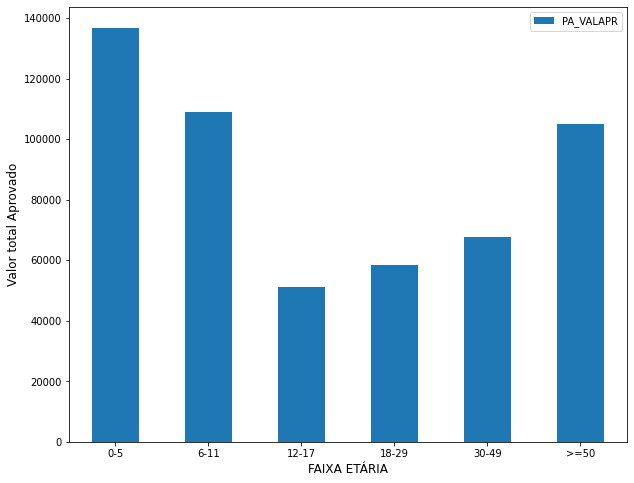

In [52]:
apac_df_4.set_index('FAIXA_ETÁRIA').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12);

In [53]:
#agrupando pela faixa etária e nome do estabelecimento e contabilizando a recorrência do aparecimento desses conjuntos
apac_df_5 = apac_df_1.groupby(['FAIXA_ETÁRIA', 'NOME_ESTABELECIMENTO']).size().reset_index(name="contagem")
apac_df_5 = pd.DataFrame(apac_df_5)
apac_df_5

,FAIXA_ETÁRIA,NOME_ESTABELECIMENTO,contagem
0,0-5,CENTRAL DE REGULAMENTAÇÃO DE ACESSO,24
1,0-5,CENTRAL DE REGULAMENTAÇÃO MÉDICA DE URGÊNCIAS,1
2,0-5,CENTRO DE APOIO A SAÚDE DA FAMÍLIA (CASF),1
3,0-5,CENTRO DE SAÚDE/UNIDADE BÁSICA DE SAÚDE,1773
4,0-5,CLÍNICA/CENTRO DE ESPECIALIDADE,653
...,...,...,...
87,>=50,PRONTO ATENDIMENTO,2097
88,>=50,PRONTO SOCORRO ESPECIALIZADO,17
89,>=50,PRONTO SOCORRO GERAL,86
90,>=50,UNIDADE DE SERVIÇO DE APOIO DE DIAGNOSE E TERAPIA,183


In [54]:
#ordenando os valores pela faixa etária
apac_df_5.sort_values(by=['FAIXA_ETÁRIA'])

,FAIXA_ETÁRIA,NOME_ESTABELECIMENTO,contagem
0,0-5,CENTRAL DE REGULAMENTAÇÃO DE ACESSO,24
14,0-5,UNIDADE MISTA,13
13,0-5,UNIDADE DE SERVIÇO DE APOIO DE DIAGNOSE E TERAPIA,9
12,0-5,PRONTO SOCORRO GERAL,148
11,0-5,PRONTO SOCORRO ESPECIALIZADO,82
...,...,...,...
76,>=50,CENTRAL DE GESTÃO EM SAÚDE,14
75,>=50,CENTRAL DE ABASTECIMENTO,6
90,>=50,UNIDADE DE SERVIÇO DE APOIO DE DIAGNOSE E TERAPIA,183
82,>=50,HOSPITAL GERAL,1223


In [55]:
#arrumando a ordem da coluna FAIXA_ETÁRIA
sorter = ['0-5', '6-11', '12-17', '18-29', '30-49', '>=50']
apac_df_5.FAIXA_ETÁRIA = apac_df_5.FAIXA_ETÁRIA.astype("category")
apac_df_5.FAIXA_ETÁRIA.cat.set_categories(sorter, inplace=True)

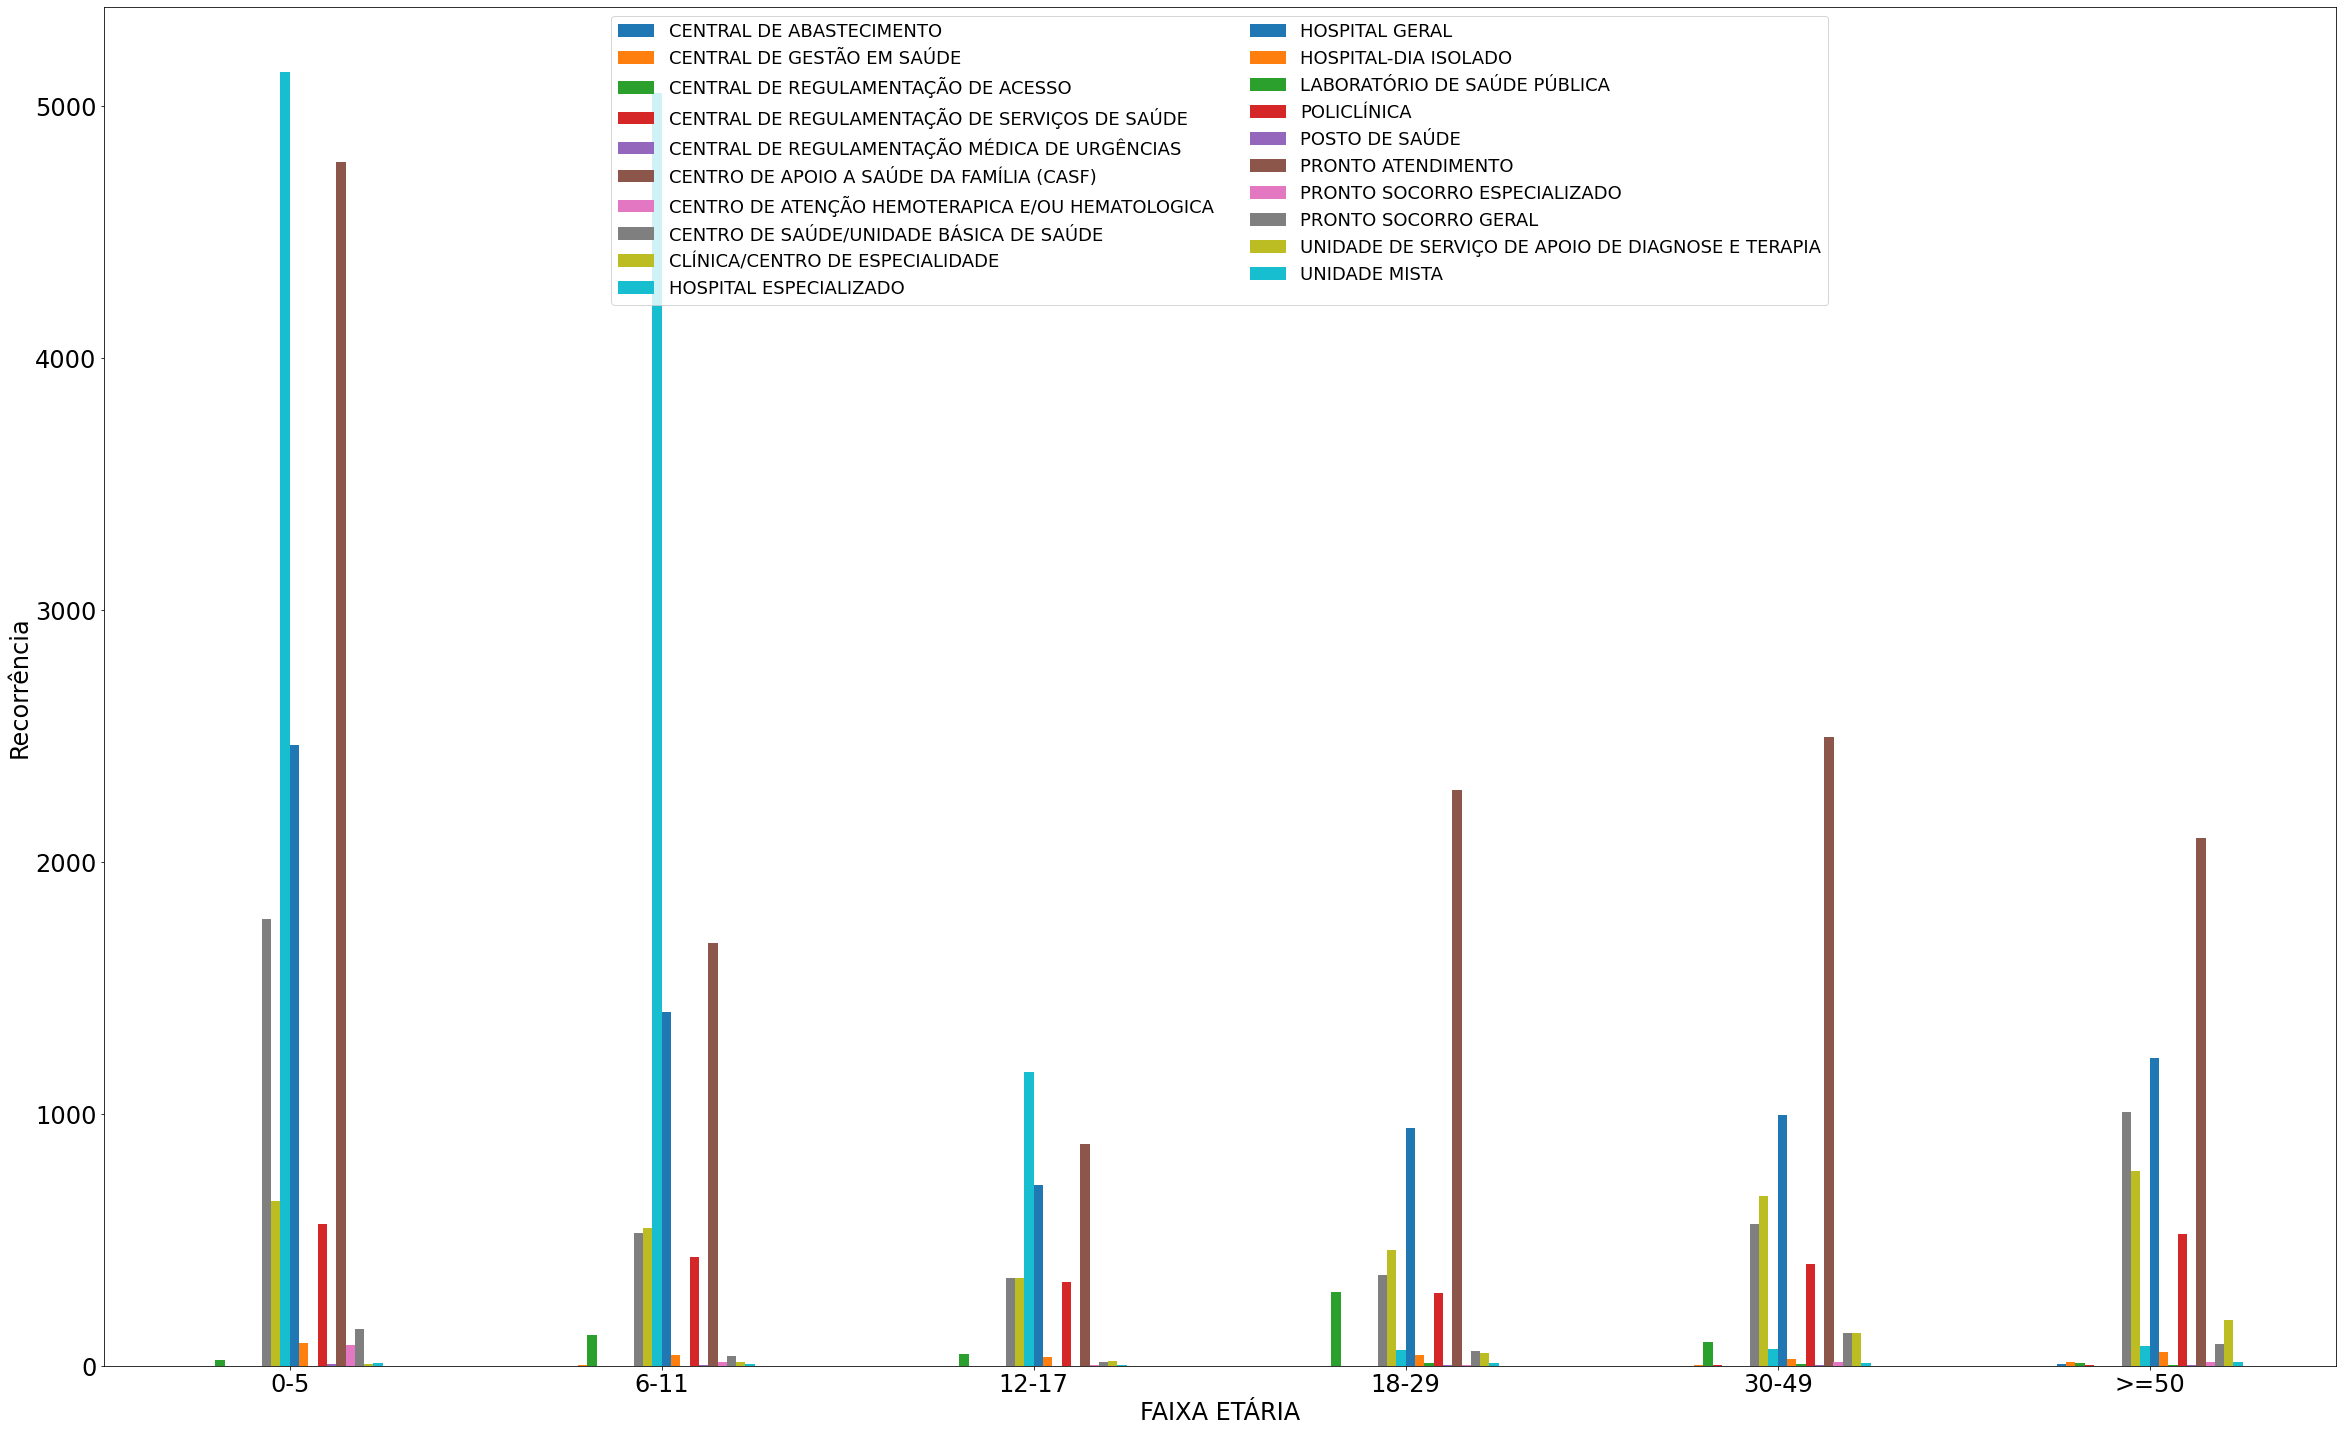

In [56]:
apac_df_5.pivot("FAIXA_ETÁRIA", "NOME_ESTABELECIMENTO", "contagem").plot(kind='bar', figsize = (40,25), rot= 0)
plt.legend(fontsize=18, loc="upper center", ncol=2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('FAIXA ETÁRIA', fontsize=24)
plt.ylabel('Recorrência', fontsize=24)
plt.show()

In [57]:
apac_df_6 = apac_df_1.groupby(['FAIXA_ETÁRIA', 'YEAR'])['PA_VALAPR'].sum().reset_index()
apac_df_6 = pd.DataFrame(apac_df_6)
apac_df_6

,FAIXA_ETÁRIA,YEAR,PA_VALAPR
0,0-5,2016,11607.53
1,0-5,2017,28026.25
2,0-5,2018,33100.11
3,0-5,2019,40440.74
4,0-5,2020,23656.92
5,12-17,2016,4582.63
6,12-17,2017,9497.25
7,12-17,2018,12550.09
8,12-17,2019,16146.27
9,12-17,2020,8516.27


In [58]:
#arrumando a ordem da coluna FAIXA_ETÁRIA
sorter = ['0-5', '6-11', '12-17', '18-29', '30-49', '>=50']
apac_df_6.FAIXA_ETÁRIA = apac_df_6.FAIXA_ETÁRIA.astype("category")
apac_df_6.FAIXA_ETÁRIA.cat.set_categories(sorter, inplace=True)

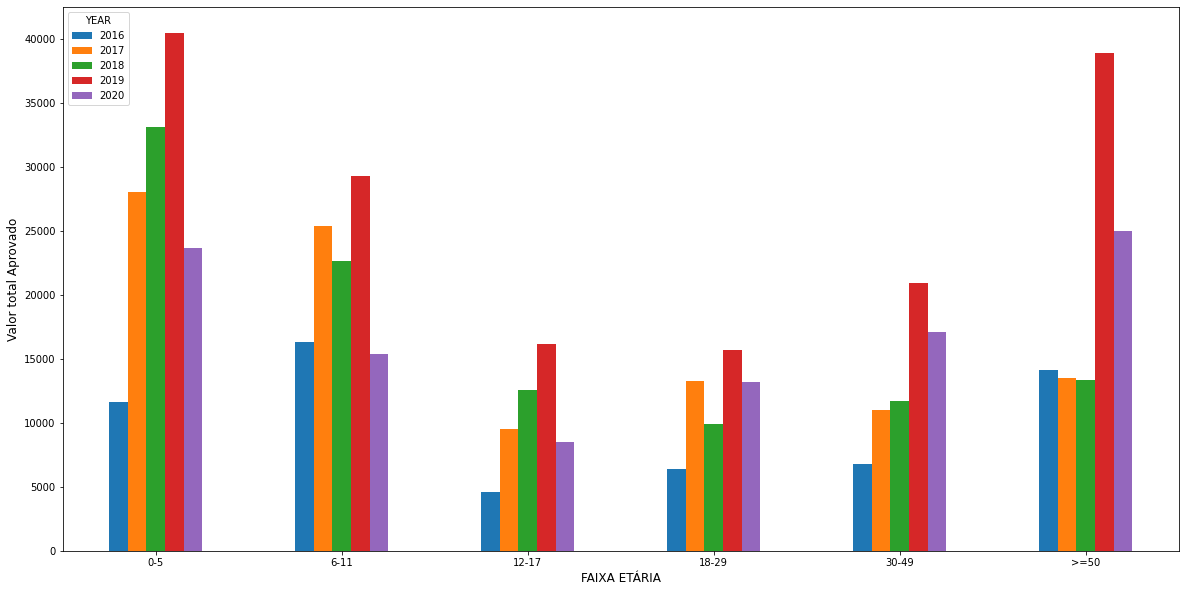

In [59]:
apac_df_6.pivot("FAIXA_ETÁRIA", "YEAR", "PA_VALAPR").plot(kind='bar', figsize = (20,10), rot= 0)
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12)
plt.show()
#2019 foi o ano que mais geerou gastos aos SUS de APAC em todas as faixas etárias 

In [60]:
apac_df_6_a = apac_df_6.groupby(['FAIXA_ETÁRIA'])['PA_VALAPR'].mean().reset_index(name='MEDIA_GASTOS_TOTAIS')
apac_df_6_a = pd.DataFrame(apac_df_6_a)
apac_df_6_a

,FAIXA_ETÁRIA,MEDIA_GASTOS_TOTAIS
0,0-5,27366.310
1,6-11,21786.302
2,12-17,10258.502
3,18-29,11670.028
4,30-49,13506.356
5,>=50,20980.606


In [61]:
apac_df_6_a['MEDIA_GASTOS_TOTAIS'] = [ round(elem, 2) for elem in apac_df_6_a['MEDIA_GASTOS_TOTAIS']]
apac_df_6_a

,FAIXA_ETÁRIA,MEDIA_GASTOS_TOTAIS
0,0-5,27366.31
1,6-11,21786.30
2,12-17,10258.50
3,18-29,11670.03
4,30-49,13506.36
5,>=50,20980.61


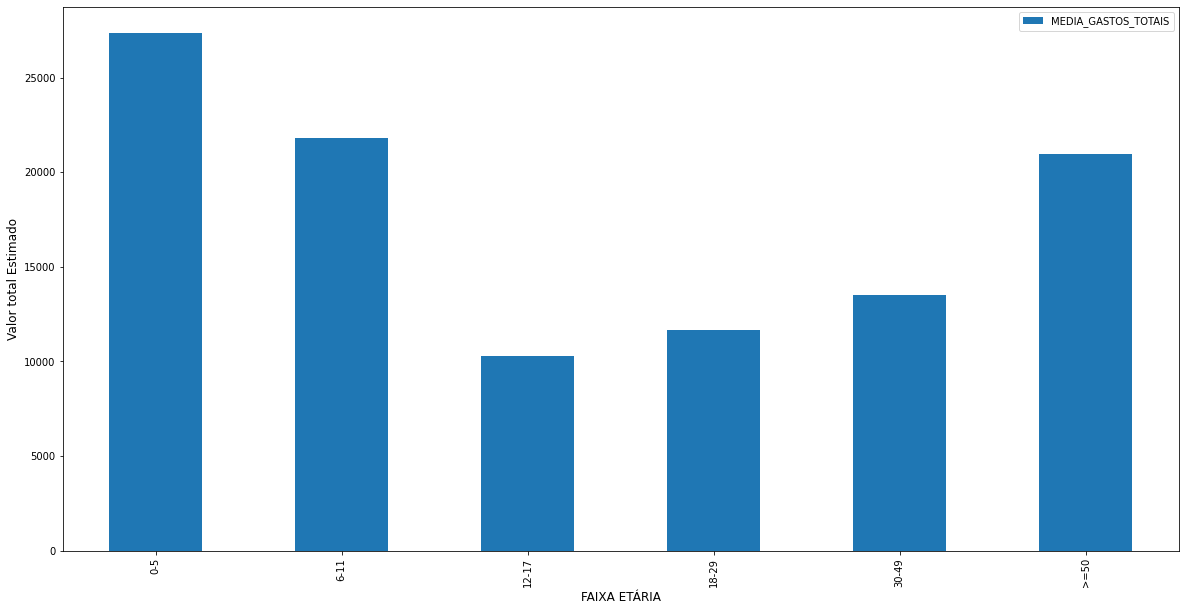

In [62]:
apac_df_6_a.plot(x = "FAIXA_ETÁRIA", kind="bar",figsize=(20,10))
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total Estimado', fontsize=12)
plt.show()

In [63]:
#analisando a complexidade do procedimento
apac_df['PA_NIVCPL'].unique()

array([2, 1, 0, 3])

In [64]:
apac_df_7 = apac_df_1.groupby(['PA_NIVCPL'])['PA_VALAPR'].sum().reset_index()
apac_df_7 = pd.DataFrame(apac_df_7)
apac_df_7

,PA_NIVCPL,PA_VALAPR
0,0,35103.35
1,1,0.00
2,2,460842.52
3,3,31894.65


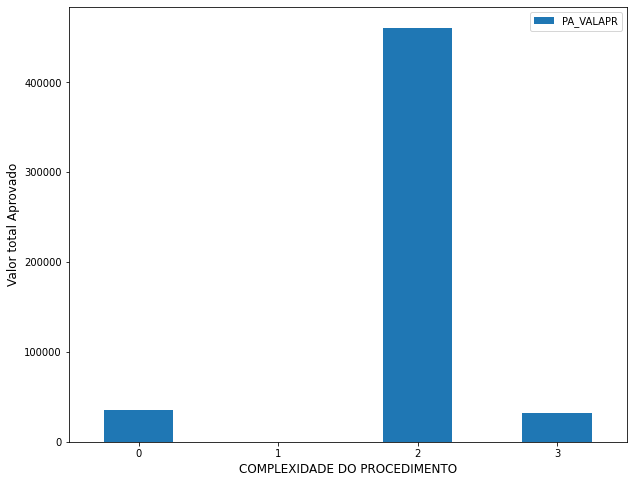

In [65]:
apac_df_7.set_index('PA_NIVCPL').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('COMPLEXIDADE DO PROCEDIMENTO', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12);

In [66]:
complexList = ["Não se aplica", "Atenção Básica", "Média Complexidade", "Alta Complexidade"]

In [67]:
apac_df_7.insert(2, 'NIVEL_COMPLEXIDADE', complexList)
apac_df_7

,PA_NIVCPL,PA_VALAPR,NIVEL_COMPLEXIDADE
0,0,35103.35,Não se aplica
1,1,0.00,Atenção Básica
2,2,460842.52,Média Complexidade
3,3,31894.65,Alta Complexidade


In [68]:
#renomeando as colunas 
apac_df_7_1 = apac_df_7.rename(columns={'PA_NIVCPL': 'Código Complexidade do Procedimento', 'PA_VALAPR': 'Valor total Aprovado', 'NIVEL_COMPLEXIDADE': 'Complexidade do Procedimento'},)
apac_df_7_1

,Código Complexidade do Procedimento,Valor total Aprovado,Complexidade do Procedimento
0,0,35103.35,Não se aplica
1,1,0.00,Atenção Básica
2,2,460842.52,Média Complexidade
3,3,31894.65,Alta Complexidade


In [69]:
#verificando qual o tamanho atual das colunas 
pd.get_option("max_colwidth")

50

In [70]:
#alinhando o header
# pd.set_option("colheader_justify", "right")

In [71]:
#quebrando o header em multiplas linhas e alinhando o seu conteúdo
apac_df_7_1.style.set_table_styles([dict(selector="th",props=[('max-width', '100px'), ('text-align', 'center')])])

,Código Complexidade do Procedimento,Valor total Aprovado,Complexidade do Procedimento
0,0,35103.350000,Não se aplica
1,1,0.000000,Atenção Básica
2,2,460842.520000,Média Complexidade
3,3,31894.650000,Alta Complexidade


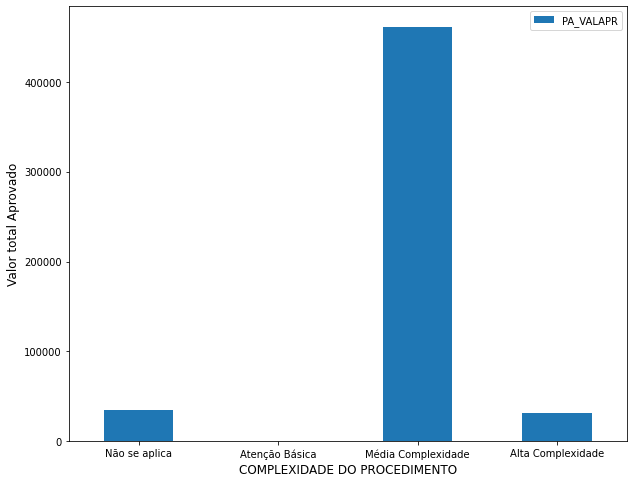

In [72]:
apac_df_7_1 = apac_df_7.iloc[:, 1:]
apac_df_7_1.set_index('NIVEL_COMPLEXIDADE').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('COMPLEXIDADE DO PROCEDIMENTO', fontsize=12)
plt.ylabel('Valor total Aprovado', fontsize=12);

In [73]:
#analisando o PA_CODOCO - Código de Ocorrência
apac_df['PA_CODOCO'].unique()

array([1, 5, 4])

Analisando a quantidade de registros existentes



In [74]:
qntReg = apac_df.groupby(['YEAR']).size().reset_index(name="REGISTROS_TOTAIS")
qntReg

,YEAR,REGISTROS_TOTAIS
0,2016,3964
1,2017,9293
2,2018,9742
3,2019,13122
4,2020,10029


In [75]:
qntReg['REGISTROS_TOTAIS'].mean()

9230.0

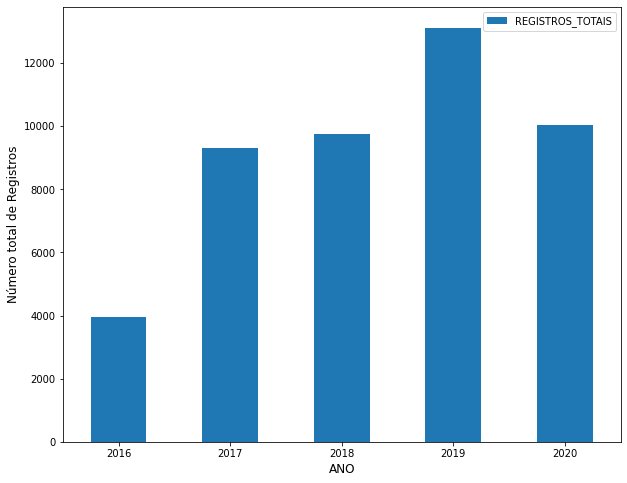

In [76]:
qntReg.set_index('YEAR').plot(kind='bar', figsize=(10, 8), rot=0)
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Número total de Registros', fontsize=12);

In [77]:
apac_df_1

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR,YEAR,MONTH,NOME_ESTABELECIMENTO,FAIXA_ETÁRIA
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE,>=50
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11,HOSPITAL GERAL,6-11
2,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,12,0,130,1,F,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE,12-17
3,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,7,0,130,1,F,3,270860,1,1,10.0,10.0,0,1,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11,HOSPITAL GERAL,6-11
4,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,207285021130003,225135,0,0,0,0,0,0,L209,0,0,1,1,0,130,1,M,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11,HOSPITAL GERAL,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46145,2062054,355220,PG,355220,0,0,0,73,0,M,46634044000174,46634044000174,0,202009,202009,301060096,6,0,2,I,0000000000000,705005007646151,225125,0,0,0,0,0,0,L20,0,0,2,68,0,130,1,F,2,355220,1,1,11.0,11.0,0,0,0.0,0.0,11.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2020,09,PRONTO ATENDIMENTO,>=50
46146,2063603,352050,PG,352050,7114,0,0,73,0,M,44733608000109,44733608000109,0,202009,202009,301060096,6,0,2,I,0000000000000,207270030590009,225125,0,0,0,0,0,0,L20,0,0,2,16,0,130,1,F,99,352050,1,1,11.0,11.0,0,0,0.0,0.0,11.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2020,09,PRONTO ATENDIMENTO,12-17
46147,7792522,355220,PG,355220,0,0,0,73,0,M,46634044000174,46634044000174,0,202009,202009,301060096,6,0,2,I,0000000000000,980016285393341,225125,0,0,0,0,0,0,L209,0,0,2,23,0,130,1,F,1,355220,1,1,11.0,11.0,0,0,0.0,0.0,11.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2020,09,PRONTO ATENDIMENTO,18-29
46148,6916074,351880,PG,351880,7114,0,0,73,0,M,46319000000150,46319000000150,0,202009,202009,301060118,6,0,2,I,0000000000000,980016282167103,223505,0,0,0,0,0,0,L209,0,0,2,7,0,130,1,F,99,351880,1,1,0.0,0.0,0,0,0.0,0.0,0.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2020,09,PRONTO ATENDIMENTO,6-11


In [78]:
#separando por idade
#custo pela faixa etária
idadeList1 = []
for i in range(len(apac_df_1)):
  val = apac_df_1['PA_IDADE'].iloc[i] 
  if val <= 18:
    idadeList1.append("menor de idade")
  else:
    idadeList1.append("adulto")

In [79]:
# apac_df_1.drop(columns=['MAIORIDADE'], inplace=True)
#apac_df_1 = apac_df_1.drop(columns=['MAIORIDADE'])

In [80]:
apac_df_1.insert(64, 'MAIORIDADE', idadeList1)
apac_df_1.head(3)

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR,YEAR,MONTH,NOME_ESTABELECIMENTO,FAIXA_ETÁRIA,MAIORIDADE
0,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,60,0,130,1,M,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE,>=50,adulto
1,2006197,270430,PG,270430,7109,0,0,5,0,M,24464109000229,24464109000229,0,201711,201711,301010072,6,0,2,I,0000000000000,980016000355683,225135,0,0,0,0,0,0,L209,0,0,1,10,0,130,1,F,3,270430,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1104,2017,11,HOSPITAL GERAL,6-11,menor de idade
2,2010216,270860,PG,270860,0,0,0,36,0,M,12264222000109,12264222000109,0,201711,201711,301010072,6,0,2,I,0000000000000,207285005440001,225135,0,0,0,0,0,0,L209,0,0,1,12,0,130,1,F,4,270860,1,1,10.0,10.0,0,0,0.0,0.0,10.0,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244,2017,11,CLÍNICA/CENTRO DE ESPECIALIDADE,12-17,menor de idade


In [81]:
qntMaioridade = apac_df_1.groupby(['MAIORIDADE']).size().reset_index(name="REGISTROS_TOTAIS")
qntMaioridade

,MAIORIDADE,REGISTROS_TOTAIS
0,adulto,16150
1,menor de idade,30000


In [82]:
labels = qntMaioridade['MAIORIDADE'].unique()
labels

array(['adulto', 'menor de idade'], dtype=object)

In [83]:
sizes = qntMaioridade['REGISTROS_TOTAIS'].unique()
sizes

array([16150, 30000])

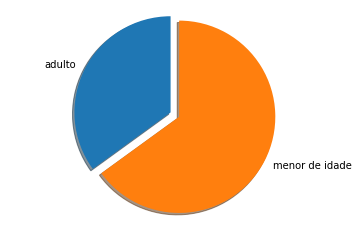

In [84]:
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

Considerando os valores mais caros para os principais medicamentos utilizados no tratamento da Dermatite Atópica, obtidos da tabela presente em:

https://www.gov.br/anvisa/pt-br/assuntos/medicamentos/cmed/precos/arquivos/lista_conformidade_2021_11_v2.pdf

Serão considerados os valores de PF (pessoa física) com ICMS de 20%, pois este é o pior cenário que pode ser apresentado ao SUS.

**MEDICAMENTOS:**


**- metotrexato: considerando dose semanal de 25mg 1 por semana // preço máximo: R$25,91  TECNOMET (ZODIAC FARMACÊUTICOS) 2,5 MG COM CT BL AL PLAS AMB X 20 https://www.bad.org.uk/shared/get-file.ashx?id=1495&itemtype=document**

**- ciclosporina: máximo de 5 mg/kg/dia // preço máximo: R$597,13  para CICLOSPORINA (GERMED) 100 MG CAP MOLE CT BL AL/AL X 50 https://www.saudedireta.com.br/docsupload/1340102276Capitulo10.pdf**

**- azatioprina: máximo de 5 mg/kg/dia // preço máximo R$342,35 para IMURAN (ASPEN PHARMA) 50 MG COM REV CT BL AL PLAS BR OPC X 100**

**- micofenolato de mofetila: máximo de 3 g/dia  //preço máximo R$ 6342,68 para MICOFENOLATO DE MOFETILA (CRISTÁLIA QUÍMICA) 500 MG COM REV CT BL AL PLAS TRANS X 500**

In [85]:
qntRegSexo = apac_df.groupby(['YEAR', 'PA_SEXO']).size().reset_index(name="REGISTROS_TOTAIS")
qntRegSexo

,YEAR,PA_SEXO,REGISTROS_TOTAIS
0,2016,F,2317
1,2016,M,1647
2,2017,F,5365
3,2017,M,3928
4,2018,F,5414
5,2018,M,4328
6,2019,F,7396
7,2019,M,5726
8,2020,F,5448
9,2020,M,4581


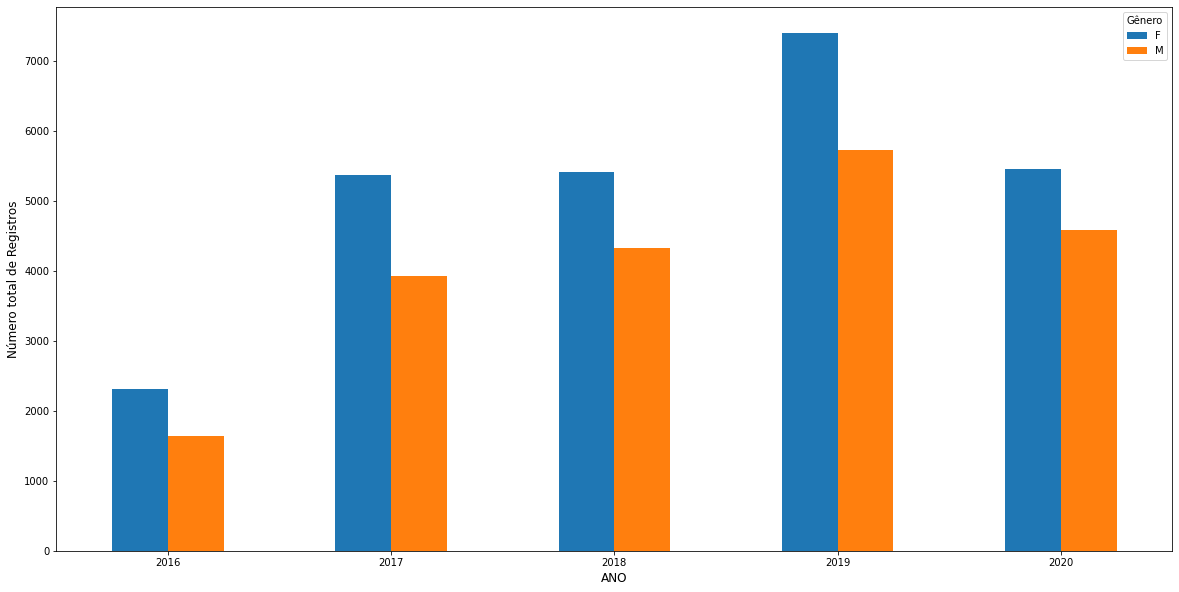

In [86]:
qntRegSexo.pivot("YEAR", "PA_SEXO", "REGISTROS_TOTAIS").plot(kind='bar', figsize = (20,10), rot= 0)
plt.legend(title = "Gênero")
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Número total de Registros', fontsize=12)
plt.show()

In [87]:
#agrupando a faixa etária pela somatória do npumero de registros verificados entre 2016-2020
apac_df_8 = apac_df_1.groupby(['FAIXA_ETÁRIA', 'YEAR']).size().reset_index(name='REGISTROS_TOTAIS')
apac_df_8 = pd.DataFrame(apac_df_8)
# apac_df_8 = apac_df_8.reindex([0, 4, 1, 2, 3, 5])
apac_df_8

,FAIXA_ETÁRIA,YEAR,REGISTROS_TOTAIS
0,0-5,2016,1290
1,0-5,2017,3421
2,0-5,2018,3524
3,0-5,2019,4333
4,0-5,2020,3174
5,12-17,2016,319
6,12-17,2017,785
7,12-17,2018,781
8,12-17,2019,1195
9,12-17,2020,839


In [88]:
apac_df_9 = apac_df_8.groupby(['FAIXA_ETÁRIA'])['REGISTROS_TOTAIS'].mean().reset_index(name='MEDIA_REGISTROS')
apac_df_9 = pd.DataFrame(apac_df_9)
apac_df_9

,FAIXA_ETÁRIA,MEDIA_REGISTROS
0,0-5,3148.4
1,12-17,783.8
2,18-29,975.8
3,30-49,1124.8
4,6-11,1977.0
5,>=50,1220.2


In [89]:
apac_df_9['MEDIA_REGISTROS'] = apac_df_9['MEDIA_REGISTROS'].astype(int)
apac_df_9

,FAIXA_ETÁRIA,MEDIA_REGISTROS
0,0-5,3148
1,12-17,783
2,18-29,975
3,30-49,1124
4,6-11,1977
5,>=50,1220


In [90]:
apac_df_9 = apac_df_9.reindex([0, 4, 1, 2, 3, 5])
apac_df_9

,FAIXA_ETÁRIA,MEDIA_REGISTROS
0,0-5,3148
4,6-11,1977
1,12-17,783
2,18-29,975
3,30-49,1124
5,>=50,1220


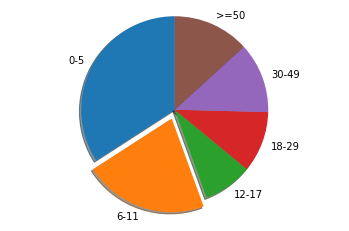

In [91]:
labels = apac_df_9['FAIXA_ETÁRIA'].unique()
sizes = apac_df_9['MEDIA_REGISTROS'].unique()

explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

**MEDICAMENTOS:**


**- metotrexato: considerando dose semanal de 25mg 1 por semana // preço máximo: R$25,91  TECNOMET (ZODIAC FARMACÊUTICOS) 2,5 MG COM CT BL AL PLAS AMB X 20 https://www.bad.org.uk/shared/get-file.ashx?id=1495&itemtype=document**

**- ciclosporina: máximo de 5 mg/kg/dia // preço máximo: R$597,13  para CICLOSPORINA (GERMED) 100 MG CAP MOLE CT BL AL/AL X 50 https://www.saudedireta.com.br/docsupload/1340102276Capitulo10.pdf**

**- azatioprina: máximo de 5 mg/kg/dia // preço máximo R$342,35 para IMURAN (ASPEN PHARMA) 50 MG COM REV CT BL AL PLAS BR OPC X 100**

**- micofenolato de mofetila: máximo de 3 g/dia  //preço máximo R$ 6342,68 para MICOFENOLATO DE MOFETILA (CRISTÁLIA QUÍMICA) 500 MG COM REV CT BL AL PLAS TRANS X 500**

**MEDICAMENTOS:**


**- metotrexato: 1 embalagem dura 2 semanas / total por embalagem 50 mg / para 1 ano total de R$673,66**

**- ciclosporina: total por embalagem 5000 mg**

**- azatioprina: total por embalagem de 5000 mg**

**- micofenolato de mofetila: 1 embalagem dura 11 semanas / total por embalagem de 250 g / para 1 ano total de R$ 31713,40**

In [92]:
pesos = [14.56, 28.85, 42.87, 60.5, 88.1, 91.5]

In [93]:
pesosFaixaEtaria = apac_df_9['FAIXA_ETÁRIA']
pesosFaixaEtaria = pd.DataFrame(pesosFaixaEtaria)
pesosFaixaEtaria

,FAIXA_ETÁRIA
0,0-5
4,6-11
1,12-17
2,18-29
3,30-49
5,>=50


In [94]:
pesosFaixaEtaria.insert(1, "PESOS", pesos)
pesosFaixaEtaria

,FAIXA_ETÁRIA,PESOS
0,0-5,14.56
4,6-11,28.85
1,12-17,42.87
2,18-29,60.50
3,30-49,88.10
5,>=50,91.50


In [95]:
#quantidade máxima diária por faixa etária
aza = []
for i in pesos:
  aza.append(i*5)
aza

[72.8, 144.25, 214.35, 302.5, 440.5, 457.5]

In [96]:
#calculando quanto dura uma embalagem
aza1 = []
for i in aza:
  aza1.append(365/(5000/i))
aza1 = [ round(elem, 0) for elem in aza1 ]
aza1

[5.0, 11.0, 16.0, 22.0, 32.0, 33.0]

In [97]:
#preço final da azatioprina
azatioprina = []
ciclosporina = []
for i in aza1:
  azatioprina.append(342.35*i)
  ciclosporina.append(597.13*i)
azatioprina = [ round(elem, 2) for elem in azatioprina ]
print(azatioprina)
ciclosporina = [ round(elem, 2) for elem in ciclosporina ]
print(ciclosporina)  

[1711.75, 3765.85, 5477.6, 7531.7, 10955.2, 11297.55]
[2985.65, 6568.43, 9554.08, 13136.86, 19108.16, 19705.29]


In [98]:
metotrexato = [673.66, 673.66, 673.66, 673.66, 673.66, 673.66]

In [99]:
micofenolato = [31713.40, 31713.40, 31713.40, 31713.40, 31713.40, 31713.40]

In [100]:
# apac_df_9.drop(columns=['METOTREXATO', 'CICLOSPORINA', 'AZATIOPRINA', 'MICOFENOLATO DE MOFETILA'], inplace=True)
# apac_df_9

In [101]:
apac_df_9.insert(2, 'METOTREXATO', metotrexato)
apac_df_9.insert(3, 'CICLOSPORINA', ciclosporina)
apac_df_9.insert(4, 'AZATIOPRINA', azatioprina)
apac_df_9.insert(5, 'MICOFENOLATO DE MOFETILA', micofenolato)

In [102]:
apac_df_9

,FAIXA_ETÁRIA,MEDIA_REGISTROS,METOTREXATO,CICLOSPORINA,AZATIOPRINA,MICOFENOLATO DE MOFETILA
0,0-5,3148,673.66,2985.65,1711.75,31713.4
4,6-11,1977,673.66,6568.43,3765.85,31713.4
1,12-17,783,673.66,9554.08,5477.60,31713.4
2,18-29,975,673.66,13136.86,7531.70,31713.4
3,30-49,1124,673.66,19108.16,10955.20,31713.4
5,>=50,1220,673.66,19705.29,11297.55,31713.4


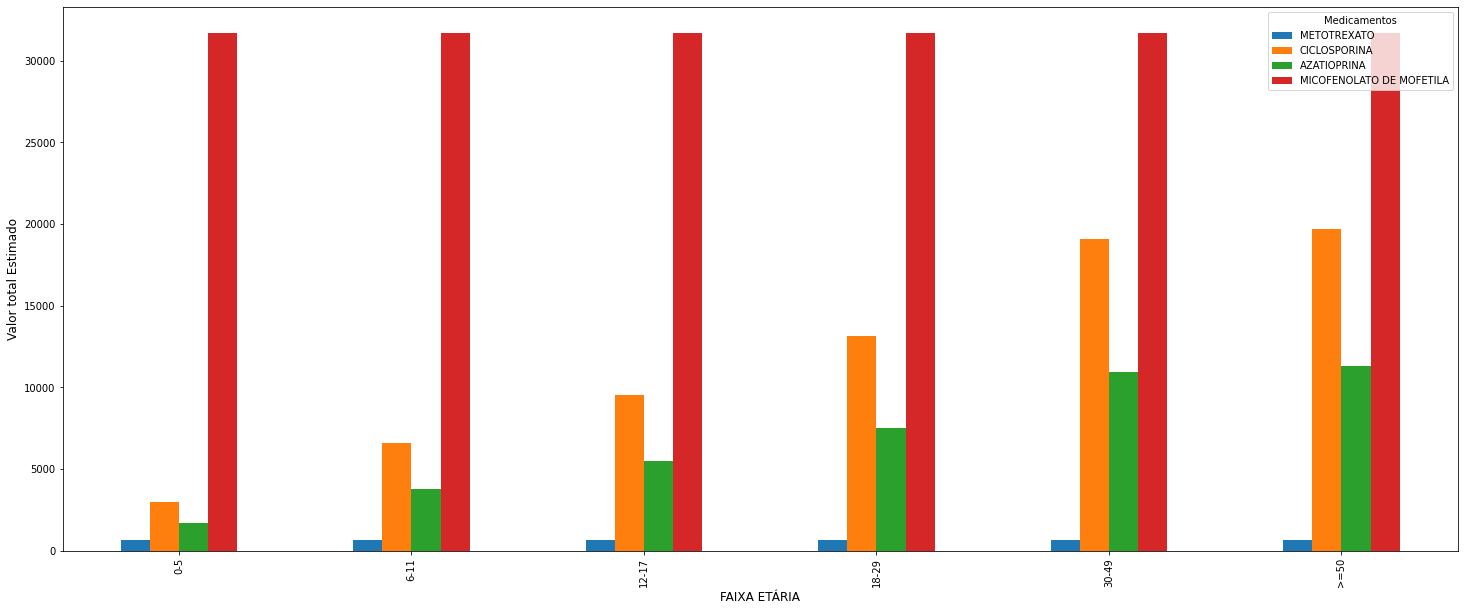

In [103]:
apac_df_9.plot(x = "FAIXA_ETÁRIA", y = ["METOTREXATO", "CICLOSPORINA", "AZATIOPRINA", "MICOFENOLATO DE MOFETILA"], kind="bar",figsize=(25,10))
plt.legend(title = "Medicamentos")
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor total Estimado', fontsize=12)
plt.show()

In [104]:
apac_df_9['CICLOSPORINA'].iloc[0]

2985.65

In [105]:
#Somatória dos valores dos 4 medicamentos juntos
total = []
for i in range(len(apac_df_9)):
  soma = apac_df_9['AZATIOPRINA'].iloc[i] + apac_df_9['CICLOSPORINA'].iloc[i] +  apac_df_9['METOTREXATO'].iloc[i] + apac_df_9['MICOFENOLATO DE MOFETILA'].iloc[i]
  total.append(soma)

total = [ round(elem, 2) for elem in total ]
total

[37084.46, 42721.34, 47418.74, 53055.62, 62450.42, 63389.9]

In [106]:
apac_df_9.insert(6, 'Total Estimado', total)

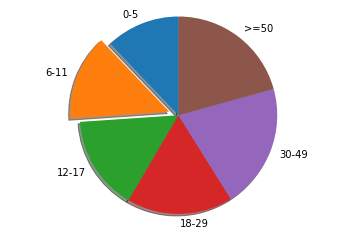

In [107]:
labels = apac_df_9['FAIXA_ETÁRIA'].unique()
sizes = apac_df_9['Total Estimado'].unique()

explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

In [108]:
apac_df_9

,FAIXA_ETÁRIA,MEDIA_REGISTROS,METOTREXATO,CICLOSPORINA,AZATIOPRINA,MICOFENOLATO DE MOFETILA,Total Estimado
0,0-5,3148,673.66,2985.65,1711.75,31713.4,37084.46
4,6-11,1977,673.66,6568.43,3765.85,31713.4,42721.34
1,12-17,783,673.66,9554.08,5477.60,31713.4,47418.74
2,18-29,975,673.66,13136.86,7531.70,31713.4,53055.62
3,30-49,1124,673.66,19108.16,10955.20,31713.4,62450.42
5,>=50,1220,673.66,19705.29,11297.55,31713.4,63389.90


In [109]:
apac_df_9.columns

Index(['FAIXA_ETÁRIA', 'MEDIA_REGISTROS', 'METOTREXATO', 'CICLOSPORINA',
       'AZATIOPRINA', 'MICOFENOLATO DE MOFETILA', 'Total Estimado'],
      dtype='object')

In [110]:
apac_df_9_a = apac_df_9.drop(columns=['MEDIA_REGISTROS', 'METOTREXATO', 'CICLOSPORINA', 'AZATIOPRINA', 'MICOFENOLATO DE MOFETILA'])
apac_df_9_a

,FAIXA_ETÁRIA,Total Estimado
0,0-5,37084.46
4,6-11,42721.34
1,12-17,47418.74
2,18-29,53055.62
3,30-49,62450.42
5,>=50,63389.90


In [111]:
apac_df_6_a

,FAIXA_ETÁRIA,MEDIA_GASTOS_TOTAIS
0,0-5,27366.31
1,6-11,21786.30
2,12-17,10258.50
3,18-29,11670.03
4,30-49,13506.36
5,>=50,20980.61


In [112]:
costs = pd.merge(apac_df_9_a, apac_df_6_a, on='FAIXA_ETÁRIA')
costs

,FAIXA_ETÁRIA,Total Estimado,MEDIA_GASTOS_TOTAIS
0,0-5,37084.46,27366.31
1,6-11,42721.34,21786.30
2,12-17,47418.74,10258.50
3,18-29,53055.62,11670.03
4,30-49,62450.42,13506.36
5,>=50,63389.90,20980.61


In [113]:
costs.rename({'FAIXA_ETÁRIA': 'FAIXAS ETÁRIAS', 'Total Anual Estimado': 'Total Estimado - Medicamentos', 'MEDIA_GASTOS_TOTAIS': 'Total Anual Estimado - APAC'}, axis=1, inplace=True)
costs

,FAIXAS ETÁRIAS,Total Estimado,Total Anual Estimado - APAC
0,0-5,37084.46,27366.31
1,6-11,42721.34,21786.30
2,12-17,47418.74,10258.50
3,18-29,53055.62,11670.03
4,30-49,62450.42,13506.36
5,>=50,63389.90,20980.61


In [114]:
#quebrando o header em multiplas linhas e alinhando o seu conteúdo
costs.style.set_table_styles([dict(selector="th",props=[('max-width', '100px'), ('text-align', 'center')])])

,FAIXAS ETÁRIAS,Total Estimado,Total Anual Estimado - APAC
0,0-5,37084.460000,27366.310000
1,6-11,42721.340000,21786.300000
2,12-17,47418.740000,10258.500000
3,18-29,53055.620000,11670.030000
4,30-49,62450.420000,13506.360000
5,>=50,63389.900000,20980.610000


In [115]:
sih = pd.read_csv('sih.csv', sep=',')
sih

,Unnamed: 0,FAIXAS ETÁRIAS,Total Anual Estimado - AIH
0,0,0-5,111377.42
1,1,6-11,77918.26
2,2,12-17,32322.56
3,3,18-29,19704.19
4,4,30-49,18605.23
5,5,>=50,47846.04


In [116]:
sih = sih[['FAIXAS ETÁRIAS', 'Total Anual Estimado - AIH']]
sih

,FAIXAS ETÁRIAS,Total Anual Estimado - AIH
0,0-5,111377.42
1,6-11,77918.26
2,12-17,32322.56
3,18-29,19704.19
4,30-49,18605.23
5,>=50,47846.04


In [117]:
costsFull = pd.merge(costs, sih, on='FAIXAS ETÁRIAS')
costsFull

,FAIXAS ETÁRIAS,Total Estimado,Total Anual Estimado - APAC,Total Anual Estimado - AIH
0,0-5,37084.46,27366.31,111377.42
1,6-11,42721.34,21786.30,77918.26
2,12-17,47418.74,10258.50,32322.56
3,18-29,53055.62,11670.03,19704.19
4,30-49,62450.42,13506.36,18605.23
5,>=50,63389.90,20980.61,47846.04


In [118]:
costsFull.columns

Index(['FAIXAS ETÁRIAS', 'Total Estimado', 'Total Anual Estimado - APAC',
       'Total Anual Estimado - AIH'],
      dtype='object')

In [119]:
col_list = ['Total Estimado', 'Total Anual Estimado - APAC','Total Anual Estimado - AIH']
costsFull.insert(4, 'Somatório', costsFull[col_list].sum(axis=1), allow_duplicates=False)
costsFull

,FAIXAS ETÁRIAS,Total Estimado,Total Anual Estimado - APAC,Total Anual Estimado - AIH,Somatório
0,0-5,37084.46,27366.31,111377.42,175828.19
1,6-11,42721.34,21786.30,77918.26,142425.90
2,12-17,47418.74,10258.50,32322.56,89999.80
3,18-29,53055.62,11670.03,19704.19,84429.84
4,30-49,62450.42,13506.36,18605.23,94562.01
5,>=50,63389.90,20980.61,47846.04,132216.55


In [120]:
costsFull.columns

Index(['FAIXAS ETÁRIAS', 'Total Estimado', 'Total Anual Estimado - APAC',
       'Total Anual Estimado - AIH', 'Somatório'],
      dtype='object')

In [121]:
lista = ['Total Estimado', 'Total Anual Estimado - APAC', 'Total Anual Estimado - AIH', 'Somatório']
for i in lista:
  costsFull[i] = [ round(elem, 2) for elem in costsFull[i]]
costsFull

,FAIXAS ETÁRIAS,Total Estimado,Total Anual Estimado - APAC,Total Anual Estimado - AIH,Somatório
0,0-5,37084.46,27366.31,111377.42,175828.19
1,6-11,42721.34,21786.30,77918.26,142425.90
2,12-17,47418.74,10258.50,32322.56,89999.80
3,18-29,53055.62,11670.03,19704.19,84429.84
4,30-49,62450.42,13506.36,18605.23,94562.01
5,>=50,63389.90,20980.61,47846.04,132216.55


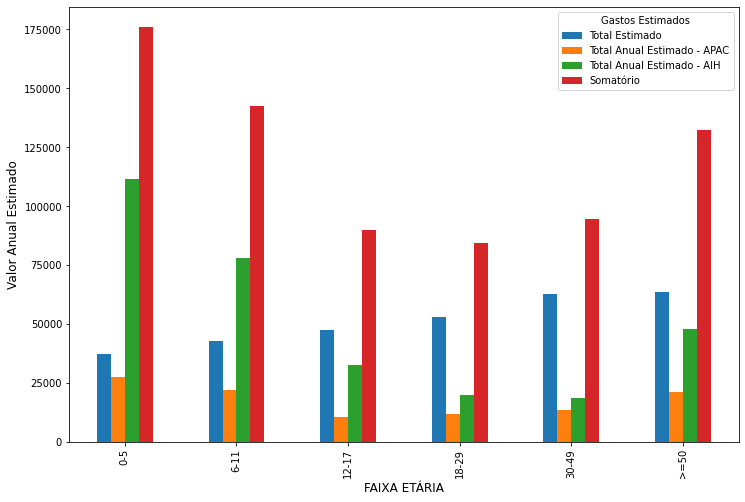

In [122]:
costsFull.plot(x = "FAIXAS ETÁRIAS", y = ['Total Estimado', 'Total Anual Estimado - APAC', 'Total Anual Estimado - AIH', 'Somatório'], kind="bar",figsize=(12,8))
plt.legend(title = "Gastos Estimados")
plt.xlabel('FAIXA ETÁRIA', fontsize=12)
plt.ylabel('Valor Anual Estimado', fontsize=12)
plt.show()

In [123]:
#quebrando o header em multiplas linhas e alinhando o seu conteúdo
costsFull.style.set_table_styles([dict(selector="th",props=[('max-width', '100px'), ('text-align', 'right')])])

,FAIXAS ETÁRIAS,Total Estimado,Total Anual Estimado - APAC,Total Anual Estimado - AIH,Somatório
0,0-5,37084.460000,27366.310000,111377.420000,175828.190000
1,6-11,42721.340000,21786.300000,77918.260000,142425.900000
2,12-17,47418.740000,10258.500000,32322.560000,89999.800000
3,18-29,53055.620000,11670.030000,19704.190000,84429.840000
4,30-49,62450.420000,13506.360000,18605.230000,94562.010000
5,>=50,63389.900000,20980.610000,47846.040000,132216.550000
